In [19]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense

In [20]:
#loading dataset

df = pd.read_csv('C:\\Users\\pkmra_fk94jjw\\Downloads\\mobile_price_classification.csv')
df.head()

,battery_power,bluetooth,clock_speed,dual_sim,front_cam,4G,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   battery_power   2000 non-null   int64  
 1   bluetooth       2000 non-null   int64  
 2   clock_speed     2000 non-null   float64
 3   dual_sim        2000 non-null   int64  
 4   front_cam       2000 non-null   int64  
 5   4G              2000 non-null   int64  
 6   int_memory      2000 non-null   int64  
 7   m_dep           2000 non-null   float64
 8   mobile_wt       2000 non-null   int64  
 9   n_cores         2000 non-null   int64  
 10  primary_camera  2000 non-null   int64  
 11  px_height       2000 non-null   int64  
 12  px_width        2000 non-null   int64  
 13  ram             2000 non-null   int64  
 14  sc_h            2000 non-null   int64  
 15  sc_w            2000 non-null   int64  
 16  talk_time       2000 non-null   int64  
 17  three_g         2000 non-null   i

In [22]:
df.shape

(2000, 21)

Total of 2000 entries present

In [23]:
#checking the label column

df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

In [24]:
#assigning data and label column

data = df.drop('price_range',axis=1)
label = df['price_range']

In [25]:
#scaling the data columns

scaler = StandardScaler()
data = scaler.fit_transform(data)

In [26]:
#data splitting to test and train model

X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=0.25,random_state = 42)

In [27]:
#ANN model building

model = Sequential()

model.add(Dense(10,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [28]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
history = model.fit(X_train, y_train, epochs=100)

Epoch 1/100
47/47 [==============================] - 1s 2ms/step - loss: 1.5500 - accuracy: 0.2680
Epoch 2/100
47/47 [==============================] - 0s 2ms/step - loss: 1.4272 - accuracy: 0.2993
Epoch 3/100
47/47 [==============================] - 0s 2ms/step - loss: 1.3366 - accuracy: 0.3440
Epoch 4/100
47/47 [==============================] - 0s 2ms/step - loss: 1.2597 - accuracy: 0.3973
Epoch 5/100
47/47 [==============================] - 0s 2ms/step - loss: 1.1877 - accuracy: 0.4647
Epoch 6/100
47/47 [==============================] - 0s 2ms/step - loss: 1.1173 - accuracy: 0.5127
Epoch 7/100
47/47 [==============================] - 0s 2ms/step - loss: 1.0499 - accuracy: 0.5487
Epoch 8/100
47/47 [==============================] - 0s 2ms/step - loss: 0.9851 - accuracy: 0.5740
Epoch 9/100
47/47 [==============================] - 0s 2ms/step - loss: 0.9245 - accuracy: 0.6047
Epoch 10/100
47/47 [==============================] - 0s 2ms/step - loss: 0.8669 - accuracy: 0.6360
Epoch 11/

Accuracy=98.53%

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 4)                 44        
                                                                 
Total params: 254
Trainable params: 254
Non-trainable params: 0
_________________________________________________________________


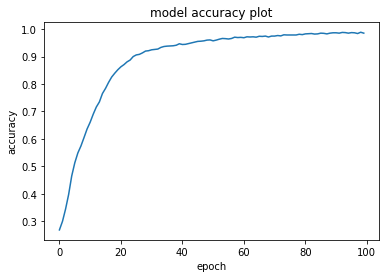

In [31]:
#accuracy model
plt.plot(history.history['accuracy'])
plt.title('model accuracy plot')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

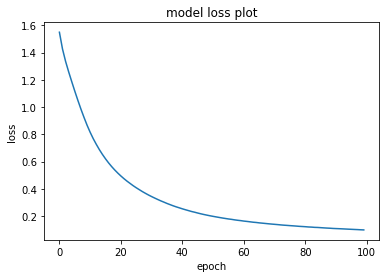

In [32]:
#loss model
plt.plot(history.history['loss'])
plt.title('model loss plot')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()
